# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
# your code here

In [3]:
import pandas as pd

In [4]:
retail= pd.read_csv("Online Retail CSV.csv")

In [5]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

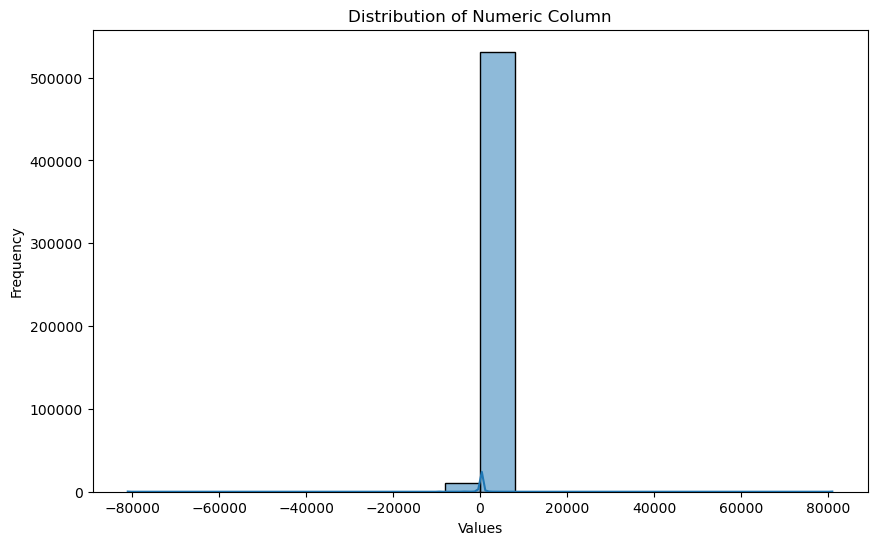

In [11]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=retail['Quantity'], bins=20, kde=True)
plt.title('Distribution of Numeric Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

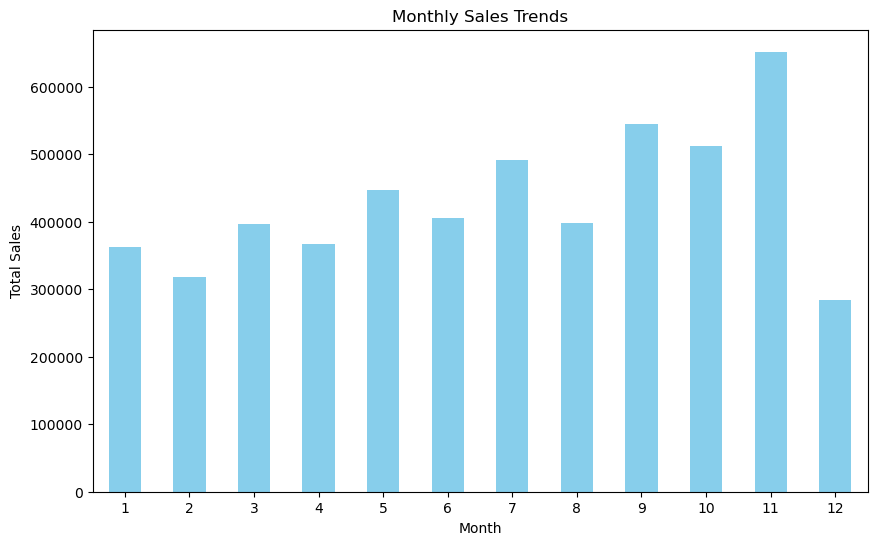

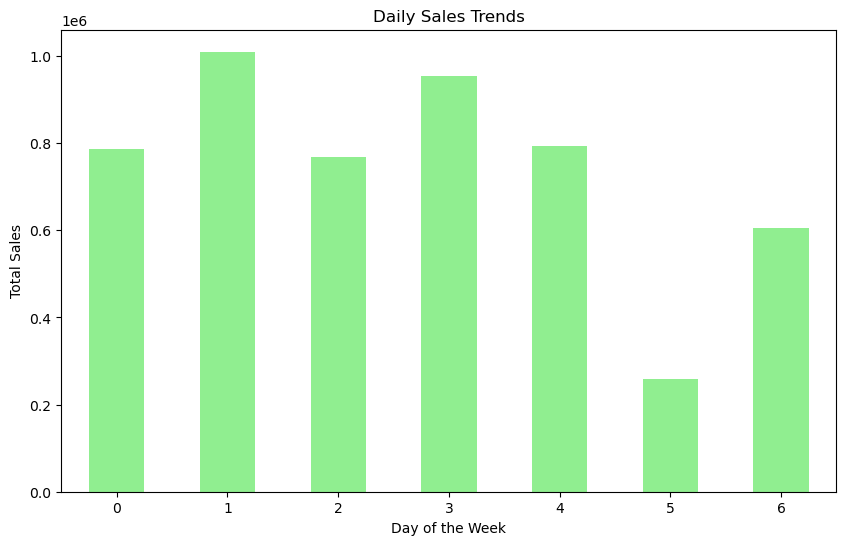

In [13]:
# Convert 'InvoiceDate' column to datetime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

# Extract month and day of the week from 'InvoiceDate'
retail['Month'] = retail['InvoiceDate'].dt.month
retail['DayOfWeek'] = retail['InvoiceDate'].dt.dayofweek

# Group by month and day of the week, and calculate total sales
monthly_sales = retail.groupby('Month')['Quantity'].sum()
daily_sales = retail.groupby('DayOfWeek')['Quantity'].sum()

# Plot sales trends over time
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='lightgreen')
plt.title('Daily Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


In [15]:
# Identify top-selling products
top_products = retail.groupby('Description')['Quantity'].sum().nlargest(10)

# Identify top-selling countries
top_countries = retail.groupby('Country')['Quantity'].sum().nlargest(10)

print("Top Selling Products:")
print(top_products)
print("\nTop Selling Countries:")
print(top_countries)


Top Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

Top Selling Countries:
Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


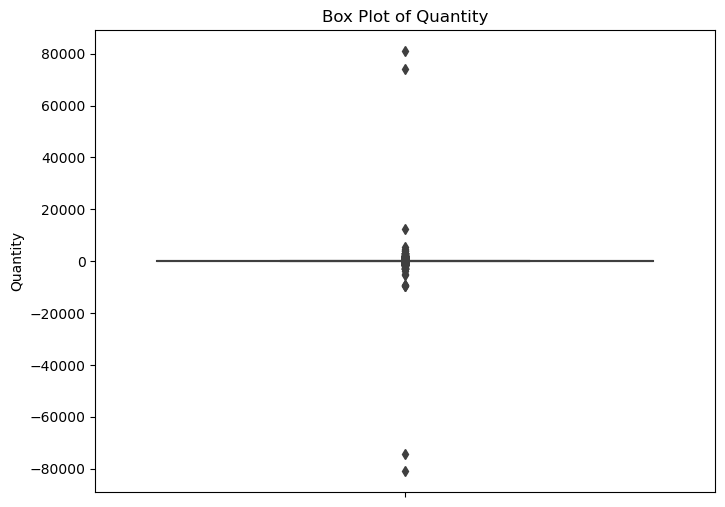

Outliers:
       InvoiceNo StockCode                       Description  Quantity  \
9         536367     84879     ASSORTED COLOUR BIRD ORNAMENT        32   
31        536370     10002       INFLATABLE POLITICAL GLOBE         48   
44        536370     22492           MINI PAINT SET VINTAGE         36   
46        536371     22086   PAPER CHAIN KIT 50'S CHRISTMAS         80   
65        536374     21258        VICTORIAN SEWING BOX LARGE        32   
...          ...       ...                               ...       ...   
541835    581579     23581            JUMBO BAG PAISLEY PARK        40   
541865    581583     20725           LUNCH BAG RED RETROSPOT        40   
541866    581583     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        36   
541867    581584     20832  RED FLOCK LOVE HEART PHOTO FRAME        72   
541868    581584     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        48   

               InvoiceDate  UnitPrice  CustomerID         Country  Month  \
9      2010-01-12 08:34:0

In [17]:
# Plot box plot to visualize outliers in 'Quantity'
plt.figure(figsize=(8, 6))
sns.boxplot(data=retail, y='Quantity')
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.show()

# Identify outliers based on box plot
outliers = retail[retail['Quantity'] > retail['Quantity'].quantile(0.95)]
print("Outliers:")
print(outliers)

In [ ]:
# Exploratory Data Analysis Summary

## Introduction
I analyzed the Online Retail dataset to uncover key insights about sales patterns, top-selling products, and customer behavior.

## Exploratory Data Analysis
### Distribution of Quantity
- The quantity distribution is right-skewed, indicating most transactions involve small quantities.

### Sales Trends Over Time
- **Monthly Sales Trends:** November has the highest sales, suggesting a peak during the holiday season.
- **Daily Sales Trends:** Sales peak on Mondays and Wednesdays, with the lowest sales on Fridays.

### Top-Selling Products and Countries
- **Top-Selling Products:** Popular items include "WORLD WAR 2 GLIDERS ASSTD DESIGNS"  and "JUMBO BAG RED RETROSPOT". 
- **Top-Selling Countries:** The UK is the leading market, followed by Netherlands and EIRE.

### Outliers and Anomalies
- Several high-quantity transactions likely represent bulk orders or potential data entry errors.

## Key Insights
- Sales increase significantly during the holiday season.
- Most customers prefer shopping towards the end of the week.
- The UK market shows strong performance with opportunities for growth in Europe.

## Recommendations
- Investigate bulk order transactions for potential business opportunities.
- Focus marketing efforts on the holiday season and end-of-week promotions.

## Conclusion
The analysis provided valuable insights into sales patterns and customer behavior, highlighting key areas for potential growth and improvement.
